In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from pylab import rcParams
rcParams['figure.figsize']= 14,8
random_seed=42
LABELS=["Present","not present"] 

In [2]:
df=pd.read_csv('./geo_lo.csv',sep=',')
df.head()

,LUM,LUMquintile,TrainDistThresh,TrainPres,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,...,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile,Latitude,Longitude
0,0.418636,4,0,0,1,1,2,2,2,2,...,21768.170070,4,0.419933,2,775.371825,3,0.063443,2,-38.1567,144.5551
1,0.512726,4,1,0,1,1,7,5,7,5,...,1812.155338,1,2.996704,4,315.721995,1,0.025997,1,-38.1333,144.3500
2,0.209689,2,0,0,1,1,5,3,4,4,...,5267.718643,2,2.670940,4,746.243079,2,0.135687,3,-38.1700,144.3960
3,0.847546,5,1,1,1,1,7,5,7,5,...,1663.495404,1,9.479434,5,316.179185,1,0.172038,3,-38.1674,144.3658
4,0.307938,3,0,0,1,1,3,2,4,3,...,4325.191244,1,0.329327,2,669.341899,2,0.157551,3,-38.1200,144.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LUM                         46 non-null     float64
 1   LUMquintile                 46 non-null     int64  
 2   TrainDistThresh             46 non-null     int64  
 3   TrainPres                   46 non-null     int64  
 4   BusDistThresh               46 non-null     int64  
 5   BusPres                     46 non-null     int64  
 6   AccUtDestPres               46 non-null     int64  
 7   AccUtDestPresquintile       46 non-null     int64  
 8   AccUtDestDist               46 non-null     int64  
 9   AccUtDestDistquintile       46 non-null     int64  
 10  SprtLeiDens                 46 non-null     float64
 11  SprtLeiDensquintile         46 non-null     int64  
 12  SprtLeiDist                 46 non-null     float64
 13  SprtLeiDistquintile         46 non-nu

In [4]:
#creating dependent and independent attributes
columns=df.columns.tolist()
columns=[c for c in columns if c not in ['TrainPres']]
target='TrainPres'
state=np.random.RandomState(42)
x=df[columns]
y=df[target]
x_outliers=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(46, 39)
(46,)


In [5]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

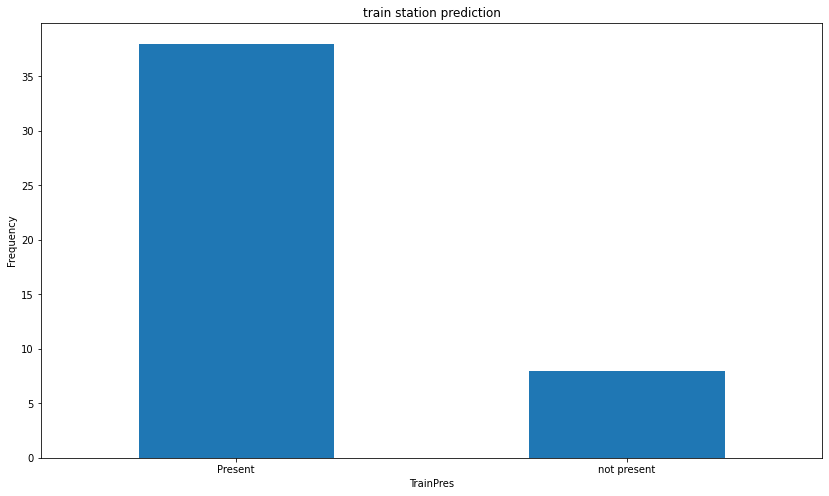

In [6]:
count_TrainPres=pd.value_counts(df['TrainPres'],sort =True)
count_TrainPres.plot(kind='bar',rot=0)
plt.title('train station prediction')
plt.xticks(range(2),LABELS)
plt.xlabel('TrainPres')
plt.ylabel('Frequency')


In [27]:
notpresent=df[df['TrainPres']==0]
present=df[df['TrainPres']==1]
print(notpresent.shape,present.shape)

,LUM,LUMquintile,TrainDistThresh,TrainPres,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,...,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile,Latitude,Longitude
3,0.847546,5,1,1,1,1,7,5,7,5,...,1663.495404,1,9.479434,5,316.179185,1,0.172038,3,-38.1674,144.3658
9,0.533334,5,1,1,1,1,8,5,6,5,...,7280.750816,3,0.877358,3,792.878963,3,0.166972,3,-38.2000,144.3500
10,0.213630,2,1,1,1,1,6,4,6,4,...,20319.729240,4,1.617749,4,999.489893,3,0.138250,3,-38.1809,144.5985
17,0.366360,3,1,1,1,1,5,3,5,4,...,3146.363437,1,3.180212,5,483.667379,1,0.229948,5,-38.1236,144.3563
22,0.503964,4,0,1,1,1,6,4,5,4,...,7262.991040,3,1.595320,4,534.844319,2,0.157992,3,-38.0741,144.3586
23,0.205386,2,1,1,0,1,7,5,2,5,...,8640.036685,3,0.577951,2,1362.216799,4,0.181499,4,-38.0229,144.3964
28,0.658778,5,1,1,1,1,7,5,7,5,...,6724.783286,3,2.269470,4,405.319499,1,0.187973,4,-38.0920,144.3560
38,0.034904,1,0,1,0,0,3,2,1,3,...,11609.054380,4,0.000000,1,9174.590991,5,0.000000,1,-37.9616,144.4997


In [8]:
from imblearn.combine import SMOTETomek


In [9]:
##oversampling
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)
x_res.shape,y_res.shape


((68, 39), (68,))

In [10]:
from collections import Counter
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 34, 1: 34})


In [43]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(ratio=1)
x_train_res,y_train_res=os.fit_sample(x,y)
x_train_res.shape,y_train_res.shape

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [55]:
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_train_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 38, 1: 38})


In [12]:
#co-relation
x=df.drop('TrainPres' , axis=1)
y=df['TrainPres']

x.shape,y.shape

((46, 39), (46,))

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [19]:
#constant removal
# constant_filter=VarianceThreshold(threshold=0)
# constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [1]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=8, random_state=42).fit(x_train) 

NameError: name 'x_train' is not defined

In [ ]:
kmeans.labels_

In [ ]:
testing = np.array(x.iloc[45])
testing

In [59]:
kmeans.predict([testing])

array([3], dtype=int32)

In [ ]:
kmeans.cluster_centers_